## TRAINING MODELS

• Using a direct “closed-form” equation that directly computes the model parame‐
ters that best fit the model to the training set (i.e., the model parameters that
minimize the cost function over the training set).

• Using an iterative optimization approach, called Gradient Descent (GD), that
gradually tweaks the model parameters to minimize the cost function over the
training set, eventually converging to the same set of parameters as the first
method. We will look at a few variants of Gradient Descent that we will use again
and again when we study neural networks in Part II: Batch GD, Mini-batch GD,
and Stochastic GD.


### Linear Regression


In practice, it is simpler to minimize the Mean Square Error (MSE)
than the RMSE, and it leads to the same result (because the value that minimizes a
function also minimizes its square root).1

### The Normal Equation

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] 

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best




array([[4.08960276],
       [3.11154389]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08960276],
       [10.31269054]])

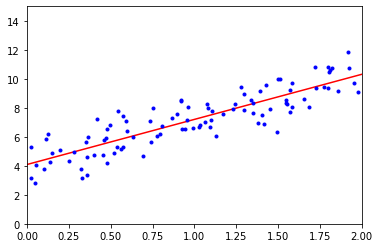

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.08960276],
       [10.31269054]])

### Computational Complexity


 making predictions on twice as many
instances (or twice as many features) will just take roughly twice as much time.

### Gradient Descent


Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

t. A good strategy to get to the bottom of the valley quickly
is to go downhill in the direction of the steepest slope. 

 you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function 


 If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

 if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

two main challenges with Gradient Descent: if the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local mini‐
mum, which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.


Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. 

This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function

### Batch Gradient

To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regards to each model parameter θj
. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called
a partial derivative.

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step

Once you have the gradient vector, which points uphill, just go in the opposite direc‐
tion to go downhill.

In [8]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) 
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta


array([[4.08960276],
       [3.11154389]])

To find a good learning rate, you can use grid search (see Chapter 2). However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.


You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops, but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solu‐
tion is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.


### Stochastic Gradient Descent


The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large.

Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration.

 this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age.

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is called simulated annealing,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. The function that determines the learning rate at each iteration
is called the learning schedule. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If the
learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early.

In [9]:
n_epochs = 50
t0, t1 = 5, 50 
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.10037016],
       [3.11384215]])

 If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set, then go through it instance by instance, then shuffle it again, and so
on. However, this generally converges more slowly.

 you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function. The fol‐
lowing code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the
default learning schedule (different from the preceding one), and it does not use any
regularization (penalty=None; more details on this shortly):


### Mini-batch Gradient Descent


 Batch and Stochastic Gradi‐
ent Descent: at each step, instead of computing the gradients based on the full train‐
ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), MiniGradient Descent | 119
Download from finelybook www.finelybook.com
8 While the Normal Equation can only perform Linear Regression, the Gradient Descent algorithms can be
used to train many other models, as we will see.
batch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐
tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐
ing schedule.

### Polynomial Regression


In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]


array([-2.31290703,  5.34953895])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.00898697]), array([[1.00437085, 0.51217598]]))

### Learning Curves


If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression.

this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. The model that will generalize
best in this case is the quadratic model.

 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting. 

 learning curves: these are plots of the model’s perfor‐
mance on the training set and the validation set as a function of the training set size.


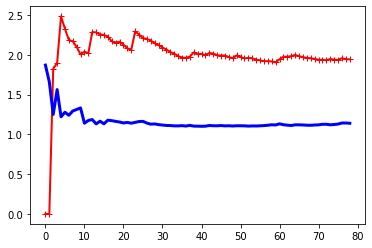

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

n the training
data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data per‐
fectly, both because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new instan‐
ces to the training set doesn’t make the average error much better or worse. 

why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve.


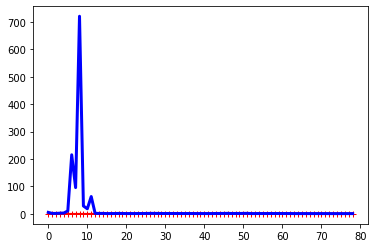

In [20]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("sgd_reg", LinearRegression()),
 ))
plot_learning_curves(polynomial_regression, X, y)

• The error on the training data is much lower than with the Linear Regression
model.


• There is a gap between the curves. This means that the model performs signifi‐
cantly better on the training data than on the validation data, which is the hall‐
mark of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.

## Regularized Linear Models


 a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For example, a simple way to regularize a polynomial model
is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

### Ridge Regression


Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.


The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean

several Ridge models trained on some linear data using different α
value. On the left, plain Ridge models are used, leading to linear predictions. On the
right, the data is first expanded using PolynomialFeatures(degree=10), then it is
scaled using a StandardScaler, and finally the Ridge models are applied to the result‐
ing features: this is Polynomial Regression with Ridge regularization. Note how
increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this
reduces the model’s variance but increases its bias.

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98480562])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2
 norm of the weight vector: this is simply Ridge
Regression.

### Lasso Regression


Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm
 
 An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features 

 looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

On the Lasso cost function, the BGD path tends to bounce across
the gutter toward the end. This is because the slope changes
abruptly at θ2 = 0. You need to gradually reduce the learning rate in
order to actually converge to the global minimum.



In [22]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.9741236])

### Elastic Net


Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0,

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost
always preferable to have at least a little bit of regularization, so generally you should
avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a
few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero as we have discussed. In general,
Elastic Net is preferred over Lasso since Lasso may behave erratically when the num‐
ber of features is greater than the number of training instances or when several fea‐
tures are strongly correlated.

In [23]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.97473153])

### Early Stopping


A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping. 

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping. 

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.


In [ ]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
 learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression


some regression algorithms can be used for classifica‐
tion as well

Logistic Regression (also called Logit Regression) is com‐
monly used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?).

### Estimating Probabilities


Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

The logistic—also called the logit, noted σ(·)—is a sigmoid function 

### Training and Cost Function


 The objective of training is to set the param‐
eter vector θ so that the model estimates high probabilities for positive instances (y =
1) and low probabilities for negative instances (y = 0). This idea is captured by the
cost function shown in Equation 4-16 for a single training instance x.

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.

The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
But the good news is that this cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the learn‐
ing rate is not too large and you wait long enough).

 Once you have the gradient vector containing all
the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you
would of course just take one instance at a time, and for Mini-batch GD you would
use a mini-batch at a time.


### Decision Boundaries


In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] 
y = (iris["target"] == 2).astype(np.int) 

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

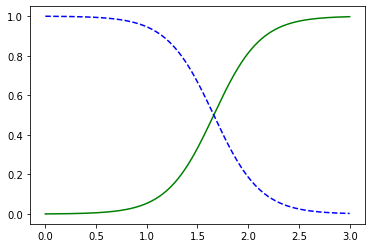

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica, or else it will predict that it is not (even if it is not very confident):

In [29]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.

### Softmax Regression


The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers (as discussed in
Chapter 3). This is called Somax Regression, or Multinomial Logistic Regression.

when given an instance x, the Softmax Regression model
first computes a score sk
(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the
scores.

Note that each class has its own dedicated parameter vector θk
. All these vectors are
typically stored as rows in a parameter matrix Θ.
Once you have computed the score of every class for the instance x, you can estimate
the probability pk
 that the instance belongs to class k by running the scores through the softmax function (Equation 4-20): it computes the exponential of every score,
then normalizes them (dividing by the sum of all the exponentials).

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score)

 The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). Minimizing the cost function shown in Equation 4-22, called the cross
entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. Cross entropy is frequently used to measure how
well a set of estimated class probabilities match the target classes

### Cross Entropy


Cross entropy originated from information theory. Suppose you want to efficiently
transmit information about the weather every day. If there are eight options (sunny,
rainy, etc.), you could encode each option using 3 bits since 23
 = 8. However, if you
think it will be sunny almost every day, it would be much more efficient to code
“sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1).
Cross entropy measures the average number of bits you actually send per option. If
your assumption about the weather is perfect, cross entropy will just be equal to the
entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assump‐
tions are wrong (e.g., if it rains often), cross entropy will be greater by an amount
called the Kullback–Leibler divergence.

Now you can compute the gradient vector for every class, then use Gradient Descent
(or any other optimization algorithm) to find the parameter matrix Θ that minimizes
the cost function.


Let’s use Softmax Regression to classify the iris flowers into all three classes. ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more
than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead.

In [30]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])